In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.widgets import Slider
import xcoll.geometry.trajectories as tr
import xcoll.geometry.segments as seg
from xcoll.geometry.crossings.find_root import FindRoot
#%matplotlib ipympl

# %matplotlib tk

## other stuff

In [ ]:
ran_1 =np.random.normal()
ran_2 =np.random.normal()   
print(ran_1, ran_2)

In [ ]:
line= seg.LineSegment(s1=10.5, x1=13.5, s2=13, x2=13.5)  
drift= tr.DriftTrajectory(s0=10., x0=12.5, xp=np.deg2rad(50.0)) 
bezier = seg.BezierSegment(s1=11, x1=14.5, cs1=11.669, cx1=13., cs2=12., cx2=12., s2=12.669, x2=14)    
halfopen = seg.HalfOpenLineSegment(s1=9, x1=13, cos_t1=np.tan(np.deg2rad(44.5)))
mcs = tr.MultipleCoulombTrajectory(s0=11, x0=13, xp=np.tan(np.deg2rad(180.)), pc=1e9, beta=1.e9/np.sqrt(0.938e9**2 + 1.e9**2),
                                     q=1, X0=0.0001, ran_1=0.6889723883213388 , ran_2=0.4150210773485264, l1=0,l2=1)


locseg = seg.segment.LocalSegment(bezier)
loctraj = tr.trajectory.LocalTrajectory(mcs)


line_box    = line.get_box()
drift_box   = drift.get_box(l1=0,l2=5)
# line_box1     = line1.get_box()
# drift_box1    = drift1.get_box(l1=0,l2=5)
# line_box2     = line2.get_box()
# drift_box2    = drift2.get_box(l1=0,l2=5)
# line_box3     = line3.get_box()
# drift_box3    = drift3.get_box(l1=0,l2=5)
bezier_box  = bezier.get_box(t1=0, t2=1)
mcs_box      = mcs.get_box(l1=0,l2=1)
#mcs_box.flag = -1.0

halfopen_box = halfopen.get_box(t1=0, t2=5)
#traj = tr.trajectory.LocalTrajectory.from_dict(drift.to_dict())

In [ ]:
ran_1 =np.random.normal()
ran_2 =np.random.normal()   

In [ ]:
plt.figure()
# mcs.plot()
bezier.plot()
#plt.figure(figsize=(8, 6))
plt.plot([line_box.s1, line_box.s2, line_box.s3, line_box.s4, line_box.s1],
         [line_box.x1, line_box.x2, line_box.x3, line_box.x4, line_box.x1], color='seagreen' , label='Line Segment')
plt.plot([drift_box.s1, drift_box.s2, drift_box.s3, drift_box.s4, drift_box.s1],
         [drift_box.x1, drift_box.x2, drift_box.x3, drift_box.x4, drift_box.x1], color='slateblue', label='Drift Trajectory')
# plt.plot([mcs_box.s1, mcs_box.s2, mcs_box.s3, mcs_box.s4, mcs_box.s1],
#          [mcs_box.x1, mcs_box.x2, mcs_box.x3, mcs_box.x4, mcs_box.x1], 'g-' )
plt.plot([halfopen_box.s1, halfopen_box.s2, halfopen_box.s3, halfopen_box.s4, halfopen_box.s1],
         [halfopen_box.x1, halfopen_box.x2, halfopen_box.x3, halfopen_box.x4, halfopen_box.x1], 'm-' )
plt.plot([bezier_box.s1, bezier_box.s2, bezier_box.s3, bezier_box.s4, bezier_box.s1],
         [bezier_box.x1, bezier_box.x2, bezier_box.x3, bezier_box.x4, bezier_box.x1], 'c-' )
plt.legend(fontsize=16)

plt.axis('equal')
plt.xlabel('s [m]',fontsize=15)
#plt.ylim(12.5,16)
plt.ylabel('x [m]',fontsize=15.)
plt.title('Intersection between Drift Trajectory and Line Segment',fontsize=15)
plt.axis()
plt.grid()
plt.show()

In [ ]:
analytical_t = np.array([]) 
analytical_l = np.array([])
cases = 100
drift_s0 = np.linspace(10, 11, cases)
#drift_x0 = np.linspace(12.5, 16.0, cases)
drift_xp = np.linspace(np.deg2rad(50), np.deg2rad(80.0), cases)
for i in range((cases)):
    line = seg.LineSegment(s1=10.5, x1=13.5, s2=14, x2=13.5)
    drift = tr.DriftTrajectory(s0=drift_s0[i], x0=12.5, xp=drift_xp[i])
    check = FindRoot()
    locseg= seg.segment.LocalSegment(line)
    loctraj= tr.trajectory.LocalTrajectory(drift)
    check.find_crossing(seg=locseg, traj=loctraj)
    analytical_l = np.append(analytical_l, check.solution_l[0])
    analytical_t = np.append(analytical_t, check.solution_t[0])

In [ ]:
def calculate_error(guess, numerical, analytical, relE, absE, guess_diff):
    print(f"numerical, analytical: {numerical}, {analytical}")
    print(f"relative error: {abs(numerical - analytical)/analytical}")
    relE = np.append(relE, abs(numerical - analytical)/analytical)
    absE = np.append(absE, abs(numerical - analytical))
    guess_diff = np.append(guess_diff, np.abs(guess - numerical))
    print(f"absolute error: {abs(numerical - analytical)}")
    print(f"guess - numerical: {abs(guess - numerical)}")
    return relE, absE, guess_diff


## Newton Convergence

In [18]:


num_iterations = 3
# Initialize sum arrays for the two valid elements
res_t_finish = np.zeros(num_iterations)
res_l_finish = np.zeros(num_iterations)
delta_t_finish = np.zeros(num_iterations)
delta_l_finish = np.zeros(num_iterations)

delta_guess_sol_l_finish = np.zeros(1)
delta_guess_sol_t_finish = np.zeros(1)
cases=100
for i in range((cases)):
    check = FindRoot()
    #line_s1 = np.linspace(10, 11, cases)
    line_x1 = np.linspace(13.5, 15, cases)
    line = seg.LineSegment(s1=10.5, x1=line_x1[i], s2=14, x2=13.5)
    half_deg = np.linspace(37,44,cases)
    halfopen = seg.HalfOpenLineSegment(s1=10.5, x1=13, cos_t1=np.tan(np.deg2rad(half_deg[i])))
    bezier_x1 = np.linspace(13.2, 14.2, cases)
    bezier = seg.BezierSegment(s1=11, x1=bezier_x1[i], cs1=11.669, cx1=13., cs2=12., cx2=12., s2=12.669, x2=14)
    mcs = tr.MultipleCoulombTrajectory(s0=11, x0=13, xp=np.tan(np.deg2rad(180.)), pc=1e9, beta=1.e9/np.sqrt(0.938e9**2 + 1.e9**2),
                                     q=1, X0=0.0001, ran_1=0.6889723883213388 , ran_2=0.4150210773485264, l1=0,l2=1)
    locseg= seg.segment.LocalSegment(line)
    loctraj= tr.trajectory.LocalTrajectory(mcs)
    check.find_crossing(seg=locseg, traj=loctraj)
    res_t_data = check.res_t
    res_l_data = check.res_l
    delta_t_data = check.delta_t
    delta_l_data = check.delta_l 
    guess_l_data = check.guess_l
    guess_t_data = check.guess_t
    solution_l_data = check.solution_l
    solution_t_data = check.solution_t

    guess_t = np.array(check.guess_t)
    guess_l = np.array(check.guess_l)
    sol_t = np.array(check.solution_t)
    sol_l = np.array(check.solution_l)
    res_t = np.array(check.res_t)
    res_l = np.array(check.res_l)
    delta_t = np.array(check.delta_t)
    delta_l = np.array(check.delta_l)
    
    delta_guess_sol_l_data = np.abs(guess_l - sol_l)
    delta_guess_sol_t_data = np.abs(guess_t - sol_t)
    # Create a boolean mask for values below 1e21
    mask = (res_t < 1e20) & (res_l < 1e20) & (delta_t < 1e20) & (delta_l < 1e20)

    # Apply mask to keep only “valid” elements
    valid_res_t = res_t[:num_iterations]        # only the first two valid
    valid_res_l = res_l[:num_iterations]
    valid_delta_t = delta_t[:num_iterations]
    valid_delta_l = delta_l[:num_iterations]
    valid_delta_guess_sol_l = delta_guess_sol_l_data[:1]
    valid_delta_guess_sol_t = delta_guess_sol_t_data[:1]
    valid_res_t = np.where(valid_res_t < 1e20, valid_res_t, 1e-16)
    valid_res_l = np.where(valid_res_l < 1e20, valid_res_l, 1e-16)
    valid_delta_t = np.where(valid_delta_t < 1e20, valid_delta_t, 1e-16)
    valid_delta_l = np.where(valid_delta_l < 1e20, valid_delta_l, 1e-16)
    valid_delta_guess_sol_l = np.where(valid_delta_guess_sol_l < 1e20, valid_delta_guess_sol_l, 1e-16)
    valid_delta_guess_sol_t = np.where(valid_delta_guess_sol_t < 1e20, valid_delta_guess_sol_t, 1e-16)

    # Add to finish arrays
    res_t_finish += valid_res_t
    res_l_finish += valid_res_l
    delta_t_finish += valid_delta_t
    delta_l_finish += valid_delta_l
    delta_guess_sol_l_finish += valid_delta_guess_sol_l
    delta_guess_sol_t_finish += valid_delta_guess_sol_t


res_t_mean = res_t_finish / cases
res_l_mean = res_l_finish / cases
delta_t_mean = delta_t_finish / cases
delta_l_mean = delta_l_finish / cases
delta_guess_sol_l_mean = delta_guess_sol_l_finish / cases
delta_guess_sol_t_mean = delta_guess_sol_t_finish / cases
    #relE_l, absE_l, guessdiff_l = calculate_error(check.guess_l[0],check.solution_l[0], analytical_l[i], relE_l, absE_l, guessdiff_l)
    #relE_t, absE_t, guessdiff_t = calculate_error(check.guess_t[0],check.solution_t[0], analytical_t[i], relE_t, absE_t, guessdiff_t)



/home/ssolstra/anaconda3/envs/xsuite/lib/python3.10/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


Finding crossing...
Using approximate crossing method.
Finding crossing approximately...
Number of initial guesses found: 1
res t: 0.00000028312206268311, res l: 0.00000009592797134417
delta t: 0.00000006285866654965, delta l: 0.00000006311672973158
res t: 0.00000000000000000000, res l: 0.00000000000000177636
delta t: 0.00000000000000033307, delta l: 0.00000000000000122125
Converged based on residuals in 2 iterations.
Finding crossing...
Using approximate crossing method.
Finding crossing approximately...
Number of initial guesses found: 1
res t: 0.00000022351741790771, res l: 0.00000015245264251007
delta t: 0.00000009205084972042, delta l: 0.00000009866055616925
res t: 0.00000000000000000000, res l: 0.00000000000000710543
delta t: 0.00000000000000133227, delta l: 0.00000000000000466294
Converged based on residuals in 2 iterations.
Finding crossing...
Using approximate crossing method.
Finding crossing approximately...
Number of initial guesses found: 1
res t: 0.00000022351741790771, r

In [19]:
print(f"average res_t: {res_t_mean}")
print(f"average res_l: {res_l_mean}")
print(f"average delta_t: {delta_t_mean}")
print(f"average delta_l: {delta_l_mean}")
print(f"average delta_guess_sol_l: {delta_guess_sol_l_mean}")


average res_t: [2.95341015e-07 5.68434189e-16 4.85325641e-16]
average res_l: [3.18578063e-07 1.87405647e-14 5.56379915e-16]
average delta_t: [8.58497379e-08 2.65176769e-15 1.79459198e-16]
average delta_l: [1.52294378e-07 9.12048215e-15 3.23233080e-16]
average delta_guess_sol_l: [1.52294379e-07]


In [ ]:
# Run once to check
check = FindRoot()
import time
time_start = time.time()
check.find_crossing(seg=locseg, traj=loctraj)
time_stop  = time.time()
print(f"Time to find crossing: {time_stop - time_start} seconds")
# The solutions are saved in the python class atm for testing. 
sol_t = check.solution_t
sol_l = check.solution_l
num = check.num_solutions
for i in range(len(check.guess_t)):
    if check.guess_t[i] < 1e21:
        print(f"Guess {i}: l = {check.guess_l[i]}, t = {check.guess_t[i]}")
for i in range(len(sol_t)):
    if sol_t[i] < 1e21:
        print(f"Solution {i}: l = {sol_l[i]}, t = {sol_t[i]}")

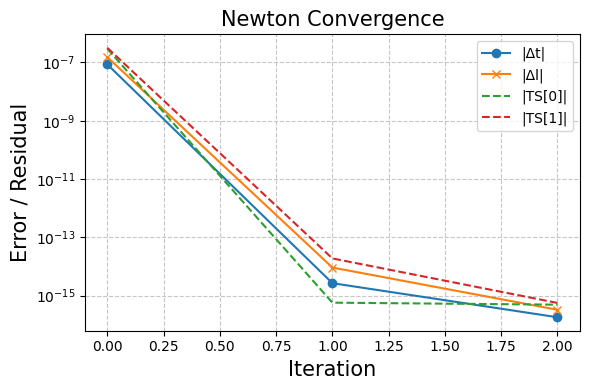

In [20]:
# X-axis: iteration number
iterations = np.arange(num_iterations)
plt.figure(figsize=(6,4))


# Plot step changes (delta)
plt.semilogy(iterations, delta_t_mean, marker='o', 
             label='|Δt|')
plt.semilogy(iterations, delta_l_mean, marker='x', label='|Δl|')

# Plot residuals
plt.semilogy(iterations, res_t_mean, '--', label='|TS[0]|')
plt.semilogy(iterations, res_l_mean, '--', label='|TS[1]|')
plt.xlabel("Iteration",fontsize=15)
plt.ylabel("Error / Residual",fontsize=15)
plt.title("Newton Convergence",fontsize=15)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
import xcoll as xc

filepath_bezier = xc._pkg_root.parent / "results" / "mcs_bezier"
filepath_halfopen = xc._pkg_root.parent / "results" / "mcs_half"
filepath_line = xc._pkg_root.parent / "results" / "mcs_line"


file = filepath_line
nest_step = "8_8.npz"

In [22]:

# Save multiple arrays in one .npz file nest_step
np.savez(file / nest_step,
         res_t=res_t_mean,
         res_l=res_l_mean,
         delta_t=delta_t_mean,
         delta_l=delta_l_mean,
         delta_guess_sol_l=delta_guess_sol_l_mean,
         delta_guess_sol_t=delta_guess_sol_t_mean,
         iterations=iterations)
print(f"Saved benchmark data to {file / nest_step}")

Saved benchmark data to /home/ssolstra/pythondev/xcoll/results/mcs_line/8_8.npz


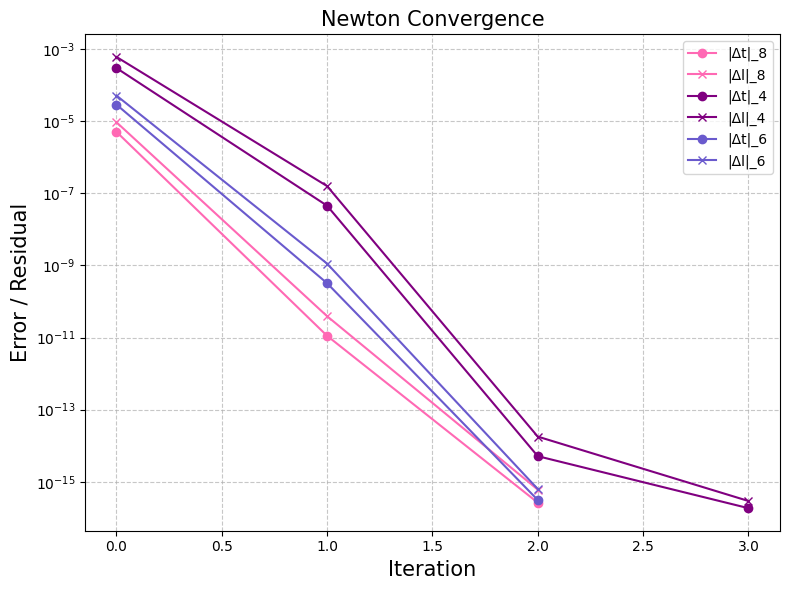

In [28]:
# data = np.load(file / "8_8.npz")
# res_t = data["res_t"]
# res_l = data["res_l"]
# delta_t = data["delta_t"]
# delta_l = data["delta_l"]
# iterations = data["iterations"]
# delta_guess_sol_l = data["delta_guess_sol_l"]
# delta_guess_sol_t = data["delta_guess_sol_t"]

data = np.load(file / "6_6.npz")
res_t_6 = data["res_t"]
res_l_6 = data["res_l"]
delta_t_6 = data["delta_t"]
delta_l_6 = data["delta_l"]
iterations_6 = data["iterations"]
delta_guess_sol_l_6 = data["delta_guess_sol_l"]
delta_guess_sol_t_6 = data["delta_guess_sol_t"]

data = np.load(file / "6_4.npz")
res_t_4 = data["res_t"]
res_l_4 = data["res_l"]
delta_t_4 = data["delta_t"]
delta_l_4 = data["delta_l"]
iterations_4 = data["iterations"]
delta_guess_sol_l_4 = data["delta_guess_sol_l"]
delta_guess_sol_t_4 = data["delta_guess_sol_t"]

data = np.load(file / "6_8.npz")
res_t_8 = data["res_t"]
res_l_8 = data["res_l"]
delta_t_8 = data["delta_t"]
delta_l_8 = data["delta_l"]
iterations_8 = data["iterations"]
delta_guess_sol_l_8 = data["delta_guess_sol_l"]
delta_guess_sol_t_8 = data["delta_guess_sol_t"]
# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(8,6))

# Step changes (delta)
# plt.semilogy(iterations, delta_t, marker='o', label='|Δt|', color = "navy")
# plt.semilogy(iterations, delta_l, marker='x', label='|Δl|', color = "navy")
# plt.semilogy(iterations, res_t, '--', label='|TS[0]|', color = "navy")
# plt.semilogy(iterations, res_l, '--', label='|TS[1]|', color = "navy")

# Step changes (delta)
plt.semilogy(iterations_8, delta_t_8, marker='o', label='|Δt|_8', color="hotpink")
plt.semilogy(iterations_8, delta_l_8, marker='x', label='|Δl|_8', color="hotpink")
# plt.semilogy(iterations_8, res_t_8, '--', label='|TS[0]|_8', color="hotpink")
# plt.semilogy(iterations_8, res_l_8, '--', label='|TS[1]|_8', color="hotpink")

# # Step changes (delta)
plt.semilogy(iterations_4, delta_t_4, marker='o', label='|Δt|_4', color="purple")
plt.semilogy(iterations_4, delta_l_4, marker='x', label='|Δl|_4', color="purple")
# plt.semilogy(iterations_4, res_t_4, '--', label='|TS[0]|_4', color="purple")
# plt.semilogy(iterations_4, res_l_4, '--', label='|TS[1]|_4', color="purple")

# Step changes (delta)
plt.semilogy(iterations_6, delta_t_6, marker='o', label='|Δt|_6', color = "slateblue")
plt.semilogy(iterations_6, delta_l_6, marker='x', label='|Δl|_6', color = "slateblue")
# plt.semilogy(iterations_6, res_t_6, '--', label='|TS[0]|_6', color = "slateblue")
# plt.semilogy(iterations_6, res_l_6, '--', label='|TS[1]|_6', color = "slateblue")

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Error / Residual", fontsize=15)
plt.title("Newton Convergence", fontsize=15)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

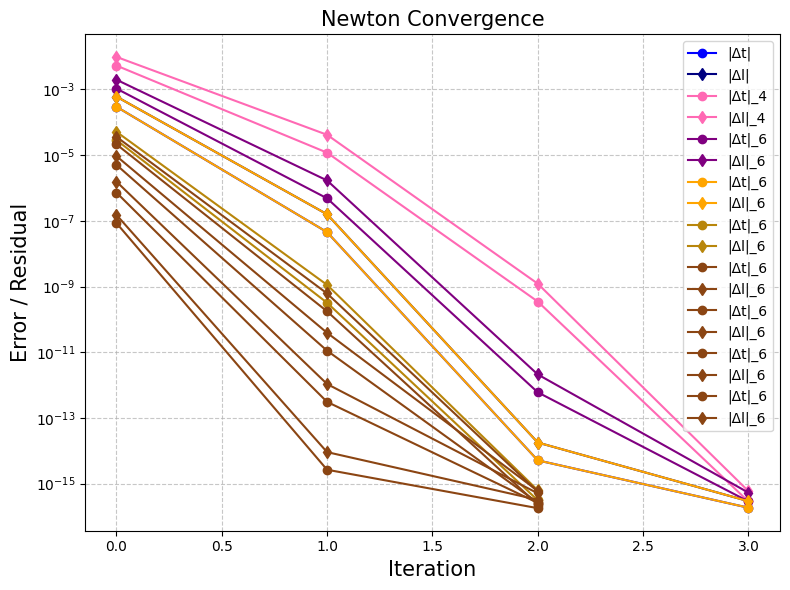

delta_t, 8-8: [0.00029767]
delta_t, 8-6: [0.00106275]
delta_t, 8-4: [0.0053391]
delta_l, 8-8: [0.00060581]
delta_l, 8-6: [0.00198095]
delta_l, 8-4: [0.00978167]


In [42]:
data = np.load(file / "4_8.npz")
res_t = data["res_t"]
res_l = data["res_l"]
delta_t = data["delta_t"]
delta_l = data["delta_l"]
iterations = data["iterations"]
delta_guess_sol_l = data["delta_guess_sol_l"]
delta_guess_sol_t = data["delta_guess_sol_t"]

data = np.load(file / "4_6.npz")
res_t_6 = data["res_t"]
res_l_6 = data["res_l"]
delta_t_6 = data["delta_t"]
delta_l_6 = data["delta_l"]
iterations_6 = data["iterations"]
delta_guess_sol_l_6 = data["delta_guess_sol_l"]
delta_guess_sol_t_6 = data["delta_guess_sol_t"]

data = np.load(file / "4_4.npz")
res_t_4 = data["res_t"]
res_l_4 = data["res_l"]
delta_t_4 = data["delta_t"]
delta_l_4 = data["delta_l"]
iterations_4 = data["iterations"]
delta_guess_sol_l_4 = data["delta_guess_sol_l"]
delta_guess_sol_t_4 = data["delta_guess_sol_t"]

data = np.load(file / "6_4.npz")
res_t_64 = data["res_t"]
res_l_64 = data["res_l"]
delta_t_64 = data["delta_t"]
delta_l_64 = data["delta_l"]
iterations_64 = data["iterations"]
delta_guess_sol_l_64 = data["delta_guess_sol_l"]
delta_guess_sol_t_64 = data["delta_guess_sol_t"]

data = np.load(file / "6_6.npz")
res_t_66 = data["res_t"]
res_l_66 = data["res_l"]
delta_t_66 = data["delta_t"]
delta_l_66 = data["delta_l"]
iterations_66 = data["iterations"]
delta_guess_sol_l_66 = data["delta_guess_sol_l"]
delta_guess_sol_t_66 = data["delta_guess_sol_t"]

data = np.load(file / "6_8.npz")
res_t_68 = data["res_t"]
res_l_68 = data["res_l"]
delta_t_68 = data["delta_t"]
delta_l_68 = data["delta_l"]
iterations_68 = data["iterations"]
delta_guess_sol_l_68 = data["delta_guess_sol_l"]
delta_guess_sol_t_68 = data["delta_guess_sol_t"]

data = np.load(file / "8_4.npz")
res_t_84 = data["res_t"]
res_l_84 = data["res_l"]
delta_t_84 = data["delta_t"]
delta_l_84 = data["delta_l"]
iterations_84 = data["iterations"]

data = np.load(file / "8_6.npz")
res_t_86 = data["res_t"]
res_l_86 = data["res_l"]
delta_t_86 = data["delta_t"]
delta_l_86 = data["delta_l"]
iterations_86 = data["iterations"]

data = np.load(file / "8_8.npz")
res_t_88 = data["res_t"]
res_l_88 = data["res_l"]
delta_t_88 = data["delta_t"]
delta_l_88 = data["delta_l"]
iterations_88 = data["iterations"]
delta_guess_sol_l_88 = data["delta_guess_sol_l"]
delta_guess_sol_t_88 = data["delta_guess_sol_t"]
# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(8,6))


# Step changes (delta)
plt.semilogy(iterations, delta_t, marker='o', label='|Δt|', color='blue')
plt.semilogy(iterations, delta_l, marker='d', label='|Δl|', color='navy')

# Step changes (delta)
plt.semilogy(iterations_4, delta_t_4, marker='o', label='|Δt|_4',color="hotpink")
plt.semilogy(iterations_4, delta_l_4, marker='d', label='|Δl|_4',color="hotpink")

# Step changes (delta)
plt.semilogy(iterations_6, delta_t_6, marker='o', label='|Δt|_6',color='purple')
plt.semilogy(iterations_6, delta_l_6, marker='d', label='|Δl|_6',color='purple')

plt.semilogy(iterations_64, delta_t_64, marker='o', label='|Δt|_6',color='orange')
plt.semilogy(iterations_64, delta_l_64, marker='d', label='|Δl|_6',color='orange')
plt.semilogy(iterations_66, delta_t_66, marker='o', label='|Δt|_6',color='darkgoldenrod')
plt.semilogy(iterations_66, delta_l_66, marker='d', label='|Δl|_6',color='darkgoldenrod')
plt.semilogy(iterations_68, delta_t_68, marker='o', label='|Δt|_6',color='saddlebrown')
plt.semilogy(iterations_68, delta_l_68, marker='d', label='|Δl|_6',color='saddlebrown')

plt.semilogy(iterations_84, delta_t_84, marker='o', label='|Δt|_6',color='saddlebrown')
plt.semilogy(iterations_84, delta_l_84, marker='d', label='|Δl|_6',color='saddlebrown')
plt.semilogy(iterations_86, delta_t_86, marker='o', label='|Δt|_6',color='saddlebrown')
plt.semilogy(iterations_86, delta_l_86, marker='d', label='|Δl|_6',color='saddlebrown')
plt.semilogy(iterations_88, delta_t_88, marker='o', label='|Δt|_6',color='saddlebrown')
plt.semilogy(iterations_88, delta_l_88, marker='d', label='|Δl|_6',color='saddlebrown')

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Error / Residual", fontsize=15)
plt.title("Newton Convergence", fontsize=15)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print(f"delta_t, 8-8: {delta_guess_sol_t}")
print(f"delta_t, 8-6: {delta_guess_sol_t_6}")   
print(f"delta_t, 8-4: {delta_guess_sol_t_4}")
print(f"delta_l, 8-8: {delta_guess_sol_l}")
print(f"delta_l, 8-6: {delta_guess_sol_l_6}")
print(f"delta_l, 8-4: {delta_guess_sol_l_4}")

In [ ]:
plt.figure(figsize=(8,6))

# Residuals
plt.semilogy(iterations, res_t, marker='o', label='|TS[0]|', color='navy')
plt.semilogy(iterations, res_l, marker='o', label='|TS[1]|', color='navy')
# Residuals
plt.semilogy(iterations_4, res_t_4,marker='D', label='|TS[0]|_4', color='slateblue')
plt.semilogy(iterations_4, res_l_4,marker='D', label='|TS[1]|_4', color='slateblue')

# Step changes (delta)
# Residuals
plt.semilogy(iterations_6, res_t_6, marker='^', label='|TS[0]|_6',color='hotpink')
plt.semilogy(iterations_6, res_l_6, marker='^', label='|TS[1]|_6', color='hotpink')

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Error / Residual", fontsize=15)
plt.title("Newton Convergence", fontsize=15)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
datasets = [
    ("8_8", iterations, delta_t, delta_l, res_t, res_l),
    ("8_4", iterations_4, delta_t_4, delta_l_4, res_t_4, res_l_4),
    ("8_6", iterations_6, delta_t_6, delta_l_6, res_t_6, res_l_6),
    # add more datasets if needed
]

colors = ["C0", "C1", "C2"]  # one color per dataset (matplotlib cycle colors)
plt.figure(figsize=(8,6))

# Plot step changes: use same color for Δt and Δl of the same dataset
for (name, it, dt, dl, rt, rl), c in zip(datasets, colors):
    plt.semilogy(it, dt, marker='o', color=c, label=f"|Δt| {name}")
    plt.semilogy(it, dl, marker='d', color=c, label=f"|Δl| {name}")

# Optionally plot residuals with same color but dashed lines
for (name, it, dt, dl, rt, rl), c in zip(datasets, colors):
    plt.semilogy(it, rt, linestyle='--', color=c, label=f"|TS[0]| {name}")
    plt.semilogy(it, rl, linestyle='--', color=c, label=f"|TS[1]| {name}")

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Error / Residual", fontsize=15)
plt.title("Newton Convergence", fontsize=15)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
data = np.load(file / "8_8.npz")
res_t = data["res_t"]
res_l = data["res_l"]
delta_t = data["delta_t"]
delta_l = data["delta_l"]
iterations = data["iterations"]
delta_guess_sol_l = data["delta_guess_sol_l"]
delta_guess_sol_t = data["delta_guess_sol_t"]

data = np.load(file / "6_8.npz")
res_t_6 = data["res_t"]
res_l_6 = data["res_l"]
delta_t_6 = data["delta_t"]
delta_l_6 = data["delta_l"]
iterations_6 = data["iterations"]
delta_guess_sol_l_6 = data["delta_guess_sol_l"]
delta_guess_sol_t_6 = data["delta_guess_sol_t"]

data = np.load(file / "4_8.npz")
res_t_4 = data["res_t"]
res_l_4 = data["res_l"]
delta_t_4 = data["delta_t"]
delta_l_4 = data["delta_l"]
iterations_4 = data["iterations"]
delta_guess_sol_l_4 = data["delta_guess_sol_l"]
delta_guess_sol_t_4 = data["delta_guess_sol_t"]

data = np.load(file / "2_8.npz")
res_t_2 = data["res_t"]
res_l_2 = data["res_l"]
delta_t_2 = data["delta_t"]
delta_l_2 = data["delta_l"]
iterations_2 = data["iterations"]
delta_guess_sol_l_2 = data["delta_guess_sol_l"]
delta_guess_sol_t_2 = data["delta_guess_sol_t"]
# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(8,6))

# Step changes (delta)
plt.semilogy(iterations, delta_t, marker='o', label='|Δt|', color = "navy")
plt.semilogy(iterations, delta_l, marker='x', label='|Δl|', color = "navy")
plt.semilogy(iterations, res_t, '--', label='|TS[0]|', color = "navy")
plt.semilogy(iterations, res_l, '--', label='|TS[1]|', color = "navy")

# Step changes (delta)
plt.semilogy(iterations_2, delta_t_2, marker='o', label='|Δt|_2', color="hotpink")
plt.semilogy(iterations_2, delta_l_2, marker='x', label='|Δl|_2', color="hotpink")
plt.semilogy(iterations_2, res_t_2, '--', label='|TS[0]|_2', color="hotpink")
plt.semilogy(iterations_2, res_l_2, '--', label='|TS[1]|_2', color="hotpink")

# Step changes (delta)
plt.semilogy(iterations_4, delta_t_4, marker='o', label='|Δt|_4', color="purple")
plt.semilogy(iterations_4, delta_l_4, marker='x', label='|Δl|_4', color="purple")
plt.semilogy(iterations_4, res_t_4, '--', label='|TS[0]|_4', color="purple")
plt.semilogy(iterations_4, res_l_4, '--', label='|TS[1]|_4', color="purple")

# Step changes (delta)
plt.semilogy(iterations_6, delta_t_6, marker='o', label='|Δt|_6', color = "slateblue")
plt.semilogy(iterations_6, delta_l_6, marker='x', label='|Δl|_6', color = "slateblue")
plt.semilogy(iterations_6, res_t_6, '--', label='|TS[0]|_6', color = "slateblue")
plt.semilogy(iterations_6, res_l_6, '--', label='|TS[1]|_6', color = "slateblue")

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Error / Residual", fontsize=15)
plt.title("Newton Convergence", fontsize=15)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Newton benchmark

 8 - 4 : Use whatever nest-step we decide from newton convergence. 
Then run the drift - line, drift - halfopen, drift-bezier and compare analytical and numerical result. 
So to compare that you need the E_abs = x_num - x_sol, and E_rel = (x_num-x_abs)/x_abs. 


In [ ]:
def calculate_error(numerical, analytical):
    relE = abs(numerical - analytical)/analytical
    absE = abs(numerical - analytical)
    print(np.mean(relE))
    print(np.mean(absE))
    return relE, absE


In [ ]:
cases=100
num_iterations = 1
# res_t_finish = np.zeros(num_iterations)
# res_l_finish = np.zeros(num_iterations)
# delta_t_finish = np.zeros(num_iterations)
# delta_l_finish = np.zeros(num_iterations)
sol_t_finish = np.array([])
sol_l_finish = np.array([])

# delta_guess_sol_l_finish = np.zeros(1)
# delta_guess_sol_t_finish = np.zeros(1)

for i in range((cases)):
    check = FindRoot()
    #line_s1 = np.linspace(10, 11, cases)
    drift= tr.DriftTrajectory(s0=10., x0=12.5, xp=np.deg2rad(50.0)) 

    line_x1 = np.linspace(13.5, 15, cases)
    line = seg.LineSegment(s1=10.5, x1=line_x1[i], s2=14, x2=13.5)
    half_deg = np.linspace(41.5,44.5,cases)
    halfopen = seg.HalfOpenLineSegment(s1=10.5, x1=13, cos_t1=np.tan(np.deg2rad(half_deg[i])))
    bezier_x1 = np.linspace(13.5, 14.5, cases)
    bezier = seg.BezierSegment(s1=11, x1=bezier_x1[i], cs1=11.669, cx1=13., cs2=12., cx2=12., s2=12.669, x2=14)
    locseg= seg.segment.LocalSegment(bezier)
    loctraj= tr.trajectory.LocalTrajectory(drift)
    check.find_crossing(seg=locseg, traj=loctraj)
    
    solution_l_data = check.solution_l
    solution_t_data = check.solution_t

    sol_t = np.array(check.solution_t)
    sol_l = np.array(check.solution_l)
    valid_sol_t  = sol_t[0]
    valid_sol_l  = sol_l[0]
    print(valid_sol_t, valid_sol_l)
    valid_sol_t   = np.where(valid_sol_t < 1e20, valid_sol_t, 1e-16)
    valid_sol_l   = np.where(valid_sol_l < 1e20, valid_sol_l, 1e-16)
    sol_t_finish = np.append(sol_t_finish, valid_sol_t)
    sol_l_finish = np.append(sol_l_finish, valid_sol_l)

In [ ]:
np.set_printoptions(precision=16)
print(sol_t_finish)

In [ ]:
import xcoll as xc
filepath = xc._pkg_root.parent / "results" / "benchmarked"
segment = "halfopen" 
name_numerical = f"newton_drift_{segment}_numerical.npz"
name_analytical = f"newton_drift_{segment}_analytical.npz"

In [ ]:

# Save multiple arrays in one .npz file nest_step
np.savez(filepath / name_numerical,
         sol_t=sol_t_finish,
         sol_l=sol_l_finish)

In [ ]:
data_analytical = np.load(filepath / name_analytical)
analytical_t = data_analytical["sol_t"]
analytical_l = data_analytical["sol_l"]

data_numerical = np.load(filepath / name_numerical)
numerical_t = data_numerical["sol_t"]
numerical_l = data_numerical["sol_l"]

In [ ]:
print(analytical_l[0:10])
print(numerical_l[0:10])

In [ ]:
relE_l = np.array([])
absE_l = np.array([])
relE_t = np.array([])
absE_t = np.array([])

# t 
relE_t, absE_t = calculate_error(numerical_t, analytical_t)
# l
relE_l, absE_l = calculate_error(numerical_l, analytical_l)

print(f"Mean relative error in l: {np.mean(relE_l)}")
print(f"Mean absolute error in l: {np.mean(absE_l)}")
print(f"Mean relative error in t: {np.mean(relE_t)}")
print(f"Mean absolute error in t: {np.mean(absE_t)}")

In [ ]:

print(f"Mean relative error in l: {np.mean(relE_l)}")
print(f"Mean absolute error in l: {np.mean(absE_l)}")
print(f"Mean relative error in t: {np.mean(relE_t)}")
print(f"Mean absolute error in t: {np.mean(absE_t)}")

## Simpson Convergence

In [ ]:
import numpy as np


In [ ]:
relE_l = np.array([])
absE_l = np.array([])
guessdiff_l = np.array([])
relE_t = np.array([])
absE_t = np.array([])
guessdiff_t = np.array([])

num_iterations = 2
# Initialize sum arrays for the two valid elements
res_t_finish = np.zeros(num_iterations)
res_l_finish = np.zeros(num_iterations)
delta_t_finish = np.zeros(num_iterations)
delta_l_finish = np.zeros(num_iterations)

delta_guess_sol_l_finish = np.zeros(1)
delta_guess_sol_t_finish = np.zeros(1)
cases=100
for i in range((cases)):
    check = FindRoot()
    #line_s1 = np.linspace(10, 11, cases)
    line_x1 = np.linspace(13.5, 15, cases)
    line = seg.LineSegment(s1=10.5, x1=line_x1[i], s2=14, x2=13.5)
    half_deg = np.linspace(37,44,cases)
    halfopen = seg.HalfOpenLineSegment(s1=10.5, x1=13, cos_t1=np.tan(np.deg2rad(half_deg[i])))
    bezier_x1 = np.linspace(13.2, 14.2, cases)
    bezier = seg.BezierSegment(s1=11, x1=bezier_x1[i], cs1=11.669, cx1=13., cs2=12., cx2=12., s2=12.669, x2=14)
    mcs = tr.MultipleCoulombTrajectory(s0=11, x0=13, xp=np.tan(np.deg2rad(180.)), pc=1e9, beta=1.e9/np.sqrt(0.938e9**2 + 1.e9**2),
                                     q=1, X0=0.0001, ran_1=0.6889723883213388 , ran_2=0.4150210773485264, l1=0,l2=1)
    locseg= seg.segment.LocalSegment(line)
    loctraj= tr.trajectory.LocalTrajectory(mcs)
    check.find_crossing(seg=locseg, traj=loctraj)
    res_t_data = check.res_t
    res_l_data = check.res_l
    delta_t_data = check.delta_t
    delta_l_data = check.delta_l 
    guess_l_data = check.guess_l
    guess_t_data = check.guess_t
    solution_l_data = check.solution_l
    solution_t_data = check.solution_t

    guess_t = np.array(check.guess_t)
    guess_l = np.array(check.guess_l)
    sol_t = np.array(check.solution_t)
    sol_l = np.array(check.solution_l)
    res_t = np.array(check.res_t)
    res_l = np.array(check.res_l)
    delta_t = np.array(check.delta_t)
    delta_l = np.array(check.delta_l)
    
    delta_guess_sol_l_data = np.abs(guess_l - sol_l)
    delta_guess_sol_t_data = np.abs(guess_t - sol_t)
    # Create a boolean mask for values below 1e21
    mask = (res_t < 1e20) & (res_l < 1e20) & (delta_t < 1e20) & (delta_l < 1e20)

    # Apply mask to keep only “valid” elements
    valid_res_t = res_t[:num_iterations]        # only the first two valid
    valid_res_l = res_l[:num_iterations]
    valid_delta_t = delta_t[:num_iterations]
    valid_delta_l = delta_l[:num_iterations]
    valid_delta_guess_sol_l = delta_guess_sol_l_data[:1]
    valid_delta_guess_sol_t = delta_guess_sol_t_data[:1]
    valid_res_t = np.where(valid_res_t < 1e20, valid_res_t, 1e-16)
    valid_res_l = np.where(valid_res_l < 1e20, valid_res_l, 1e-16)
    valid_delta_t = np.where(valid_delta_t < 1e20, valid_delta_t, 1e-16)
    valid_delta_l = np.where(valid_delta_l < 1e20, valid_delta_l, 1e-16)
    valid_delta_guess_sol_l = np.where(valid_delta_guess_sol_l < 1e20, valid_delta_guess_sol_l, 1e-16)
    valid_delta_guess_sol_t = np.where(valid_delta_guess_sol_t < 1e20, valid_delta_guess_sol_t, 1e-16)

    # Add to finish arrays
    res_t_finish += valid_res_t
    res_l_finish += valid_res_l
    delta_t_finish += valid_delta_t
    delta_l_finish += valid_delta_l
    delta_guess_sol_l_finish += valid_delta_guess_sol_l
    delta_guess_sol_t_finish += valid_delta_guess_sol_t


res_t_mean = res_t_finish / cases
res_l_mean = res_l_finish / cases
delta_t_mean = delta_t_finish / cases
delta_l_mean = delta_l_finish / cases
delta_guess_sol_l_mean = delta_guess_sol_l_finish / cases
delta_guess_sol_t_mean = delta_guess_sol_t_finish / cases

## Simpson benchmark